##ATHARVA DATE - B22AI045

In [188]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import numpy as np
import csv
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

#LDA

In [189]:
def ComputeMeanDiff(X):
    class1_mean = np.mean(X[X[:, -1] == '0.0'][:, :-1].astype(float))
    class2_mean = np.mean(X[X[:, -1] == '1.0'][:, :-1].astype(float))
    return class1_mean - class2_mean

def ComputeSW(X):
    class1_samples = X[X[:, 2] == '0.0'][:, :-1].astype(float)
    class2_samples = X[X[:, 2] == '1.0'][:, :-1].astype(float)
    class1_mean = np.mean(class1_samples, axis=0)
    class2_mean = np.mean(class2_samples, axis=0)
    class1_centered = class1_samples - class1_mean
    class2_centered = class2_samples - class2_mean
    sw_class1 = np.dot(class1_centered.T, class1_centered)
    sw_class2 = np.dot(class2_centered.T, class2_centered)
    return sw_class1 + sw_class2


def ComputeSB(X):
    class1_samples = X[X[:, -1] == '0.0'][:, :-1].astype(float)
    class2_samples = X[X[:, -1] == '1.0'][:, :-1].astype(float)
    class1_mean = np.mean(class1_samples, axis=0)
    class2_mean = np.mean(class2_samples, axis=0)

    overall_mean = np.mean(X[:, :-1].astype(float),axis=0)
    sb_class1 = len(class1_samples) * np.outer((class1_mean - overall_mean), (class1_mean - overall_mean))
    sb_class2 = len(class2_samples) * np.outer((class2_mean - overall_mean), (class2_mean - overall_mean))

    return sb_class1 + sb_class2

def GetLDAProjectionVector(X):
    sw = ComputeSW(X)
    sb = ComputeSB(X)
    eigvals, eigvecs = np.linalg.eig(np.dot(np.linalg.inv(sw), sb))
    max_idx = np.argmax(eigvals)
    return eigvecs[:, max_idx]

def project(x, y, w):
    point = np.array([x, y])
    return np.dot(point, w)

X = np.empty((0, 3))
with open('data.csv', mode ='r') as file:
    csvFile = csv.reader(file)
    for sample in csvFile:
        X = np.vstack((X, sample))

print(X)
print(X.shape)

[['1.861898431811455' '2.722962718765305' '0.0']
 ['2.235896041521318' '-2.1577206223076715' '0.0']
 ['1.6928168809937492' '0.9958960569292941' '0.0']
 ...
 ['4.466788862549782' '3.444925771903932' '1.0']
 ['5.658979877911092' '4.043340732631224' '1.0']
 ['1.9801795520124301' '7.158152050534243' '1.0']]
(2000, 3)


In [190]:
w = GetLDAProjectionVector(X)

In [191]:
X=X.astype(float)

##Task 2

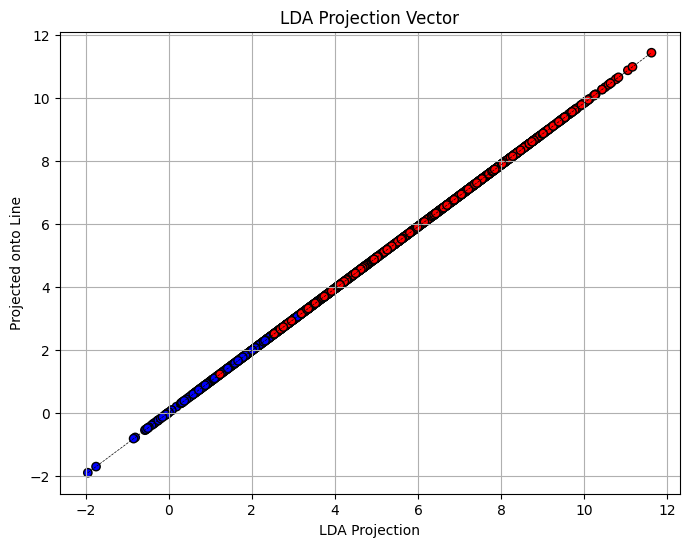

In [192]:
# Task 2: Show the LDA projection vector on a plot
plt.figure(figsize=(8, 6))

projected_points = np.dot(X[:, :-1], w)
slope = w[1] / w[0]
intercept = 0

x_line = np.linspace(np.min(projected_points), np.max(projected_points), 100)

y_line = slope * x_line + intercept

plt.scatter(projected_points, projected_points * slope, c=X[:, 2], cmap=plt.cm.bwr, marker='o', edgecolors='k')

plt.plot(x_line, y_line, color='black', linestyle='--', linewidth=0.5)

plt.xlabel('LDA Projection')
plt.ylabel('Projected onto Line')
plt.title('LDA Projection Vector')
plt.grid(True)
plt.show()


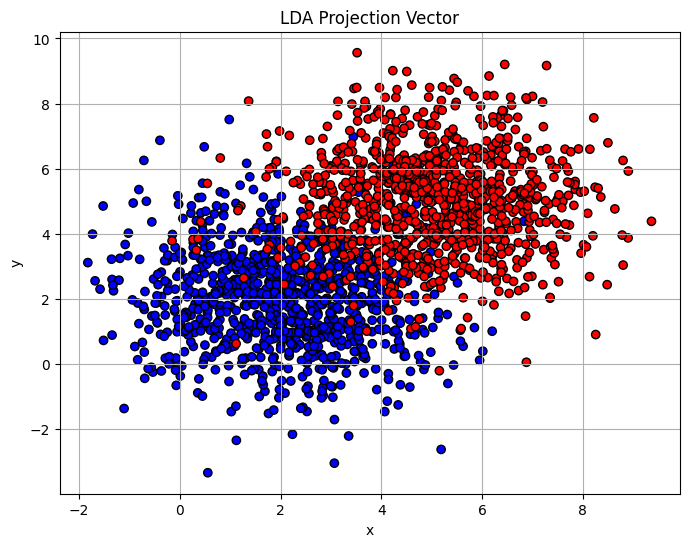

In [193]:
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=X[:, 2], cmap=plt.cm.bwr, marker='o', edgecolors='k')
plt.xlabel('x')
plt.ylabel('y')
plt.title('LDA Projection Vector')
plt.grid(True)
plt.show()


In [194]:

# Task 3: Compare the performance of 1-NN neighbor classifier on original data vs projected data
X_train, X_test, y_train, y_test = train_test_split(X[:, :-1], X[:, -1], test_size=0.3, random_state=42)

# Original Data
knn_original = KNeighborsClassifier(n_neighbors=1)
knn_original.fit(X_train, y_train)
y_pred_original = knn_original.predict(X_test)
accuracy_original = accuracy_score(y_test, y_pred_original)
print("Accuracy on Original Data:", accuracy_original)

# Projected Data
X_train_proj = np.dot(X_train, w)
X_test_proj = np.dot(X_test, w)
knn_projected = KNeighborsClassifier(n_neighbors=1)
knn_projected.fit(X_train_proj.reshape(-1, 1), y_train)
y_pred_projected = knn_projected.predict(X_test_proj.reshape(-1, 1))
accuracy_projected = accuracy_score(y_test, y_pred_projected)
print("Accuracy on Projected Data:", accuracy_projected)


Accuracy on Original Data: 0.89
Accuracy on Projected Data: 0.885


##Task3

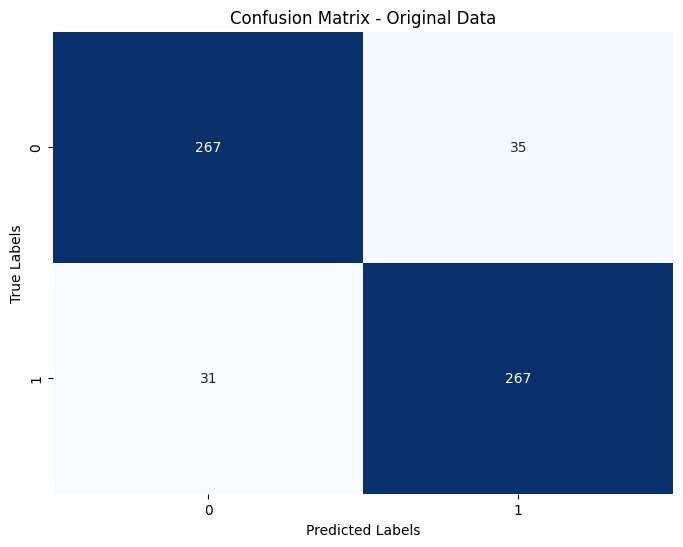

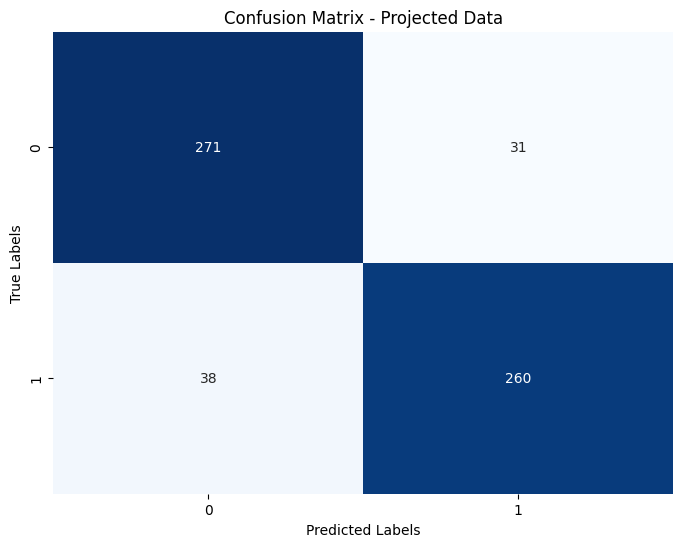

In [195]:
# Confusion matrix for original data
conf_matrix_original = confusion_matrix(y_test, y_pred_original)

# Plot confusion matrix for original data
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_original, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Original Data')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Confusion matrix for projected data
conf_matrix_projected = confusion_matrix(y_test, y_pred_projected)

# Plot confusion matrix for projected data
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_projected, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Projected Data')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

#Naive Bayes

##Task 0

In [196]:
file_path = "/content/naive_bayes.csv"
df = pd.read_csv(file_path)

X = df.drop('Play', axis=1)
y = df['Play']

df

,Outlook,Temp,Humidity,Windy,Play
0,Rainy,Hot,High,f,no
1,Rainy,Hot,High,t,no
2,Overcast,Hot,High,f,yes
3,Sunny,Mild,High,f,yes
4,Sunny,Cool,Normal,f,yes
5,Sunny,Cool,Normal,t,no
6,Overcast,Cool,Normal,t,yes
7,Rainy,Mild,High,f,no
8,Rainy,Cool,Normal,f,yes
9,Sunny,Mild,Normal,f,yes


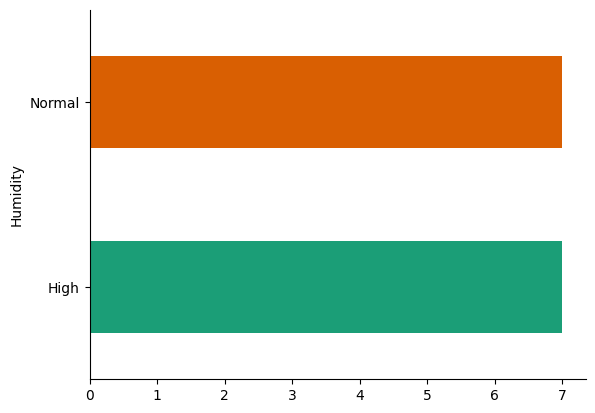

In [197]:
# @title Humidity

df.groupby('Humidity').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

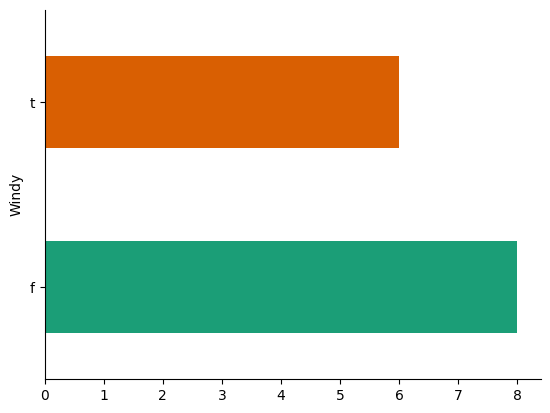

In [198]:
# @title Windy

df.groupby('Windy').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

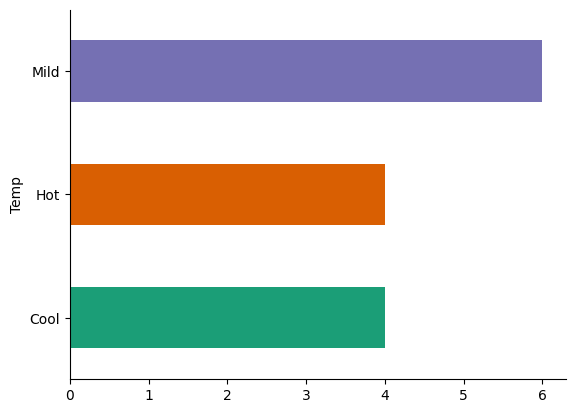

In [199]:
# @title Temp

df.groupby('Temp').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

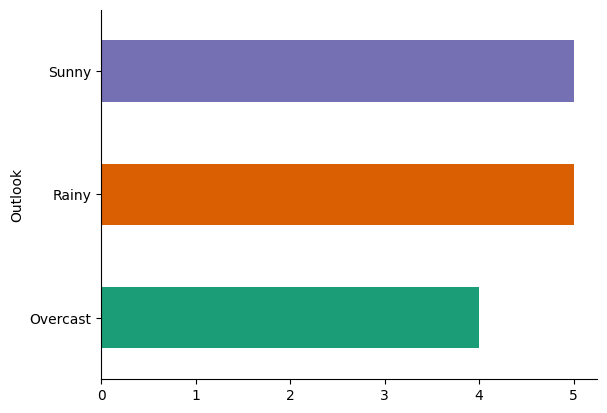

In [201]:
# @title Outlook

df.groupby('Outlook').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [202]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=2, random_state=1)

##Task 1

In [203]:
class NaiveBayesClassifier:
    def __init__(self):
        self.class_probabilities = {}
        self.feature_probabilities = {}

    def fit(self, X, y):
        X = np.array(X)
        y = np.array(y)
        n_samples, n_features = X.shape
        self.classes = np.unique(y)

        # Compute class probabilities
        for c in self.classes:
            self.class_probabilities[c] = np.sum(y == c) / n_samples


        for c in self.classes:
            X_c = X[y == c]

            feature_probabilities = {}
            for feature_index in range(n_features):
                feature_values, counts = np.unique(X_c[:, feature_index], return_counts=True)
                feature_probabilities[feature_index] = dict(zip(feature_values, counts / len(X_c)))

            self.feature_probabilities[c] = feature_probabilities

    def _predict_sample(self, x):
        probabilities = {}

        # Compute class probabilities for sample x
        for c in self.classes:
            class_prob = self.class_probabilities[c]
            feature_probs = self.feature_probabilities[c]

            # Calculate probability of sample x belonging to class c
            probability = 1
            for feature_index, feature_value in enumerate(x):
                probability *= feature_probs[feature_index].get(feature_value,0)
            probabilities[c] = probability * class_prob
        # Return the class with the highest probability
        return probabilities

    def predict(self, X):
        X = np.array(X)
        predictions = []
        for x in X:
            predictions.append(self._predict_sample(x))
        return np.array(predictions)

nb_classifier = NaiveBayesClassifier()
nb_classifier.fit(X_train, y_train)

## Task1 : Prior probabilities

In [204]:
nb_classifier.class_probabilities

{'no': 0.3333333333333333, 'yes': 0.6666666666666666}

##Task 2 : Likelihood probabilities

In [205]:
nb_classifier.feature_probabilities

{'no': {0: {'Rainy': 0.5, 'Sunny': 0.5},
  1: {'Cool': 0.25, 'Hot': 0.5, 'Mild': 0.25},
  2: {'High': 0.75, 'Normal': 0.25},
  3: {'f': 0.25, 't': 0.75}},
 'yes': {0: {'Overcast': 0.5, 'Rainy': 0.25, 'Sunny': 0.25},
  1: {'Cool': 0.375, 'Hot': 0.25, 'Mild': 0.375},
  2: {'High': 0.25, 'Normal': 0.75},
  3: {'f': 0.625, 't': 0.375}}}

In this code, class_log_prior_ represents the logarithm of the class prior probabilities, and feature_log_prob_ represents the logarithm of the class-conditional probabilities (likelihood). The actual probabilities can be obtained by exponentiating these values.

Note that the probabilities are in log scale to avoid numerical underflow issues.

##Task 3 : Posterior probabilities

In [206]:
y_post = nb_classifier.predict(X_test)
print("Predictions:", y_post)

Predictions: [{'no': 0.0078125, 'yes': 0.009765625}
 {'no': 0.0078125, 'yes': 0.009765625}]


##Task 4 : Make Predictions

In [207]:
y_pred = pd.Series([max(x, key=x.get) for x in y_post])
print("Predicted values: ", y_pred)
print("Original values: \n", y_test)

Predicted values:  0    yes
1    yes
dtype: object
Original values: 
 3    yes
7     no
Name: Play, dtype: object


In [208]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the results
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")

Accuracy: 0.5
Confusion Matrix:
[[0 1]
 [0 1]]


In [209]:
nb_classifier.class_probabilities,nb_classifier.feature_probabilities

({'no': 0.3333333333333333, 'yes': 0.6666666666666666},
 {'no': {0: {'Rainy': 0.5, 'Sunny': 0.5},
   1: {'Cool': 0.25, 'Hot': 0.5, 'Mild': 0.25},
   2: {'High': 0.75, 'Normal': 0.25},
   3: {'f': 0.25, 't': 0.75}},
  'yes': {0: {'Overcast': 0.5, 'Rainy': 0.25, 'Sunny': 0.25},
   1: {'Cool': 0.375, 'Hot': 0.25, 'Mild': 0.375},
   2: {'High': 0.25, 'Normal': 0.75},
   3: {'f': 0.625, 't': 0.375}}})

##Task 5 : Laplace smoothing

In [210]:
class NaiveBayesClassifierLaplace:
    def __init__(self):
        self.class_probabilities = {}
        self.feature_probabilities = {}

    def fit(self, X, y):
        X = np.array(X)
        y = np.array(y)
        n_samples, n_features = X.shape
        self.classes = np.unique(y)

        for c in self.classes:
            if np.sum(y == c)==0:
                self.class_probabilities[c] = (np.sum(y == c)+1) / n_samples
            else:
                self.class_probabilities[c] = (np.sum(y == c)) / n_samples


        for c in self.classes:
            X_c = X[y == c]
            feature_probabilities = {}
            for feature_index in range(n_features):
                feature_values, counts = np.unique(X_c[:, feature_index], return_counts=True)
                feature_probabilities[feature_index] = dict(zip(feature_values, (counts+1) / (len(X_c)+4)))


            self.feature_probabilities[c] = feature_probabilities
        X_c = X[y == 'no']
        self.feature_probabilities['no'][0]['Overcast'] =1/(len(X_c)+4)

    def _predict_sample(self, x):
        probabilities = {}

        for c in self.classes:
            class_prob = self.class_probabilities[c]
            feature_probs = self.feature_probabilities[c]

            probability = 1
            for feature_index, feature_value in enumerate(x):
                probability *= feature_probs[feature_index].get(feature_value, 0)
            probabilities[c] = probability * class_prob

        return probabilities

    def predict(self, X):
        X = np.array(X)
        predictions = []
        for x in X:
            predictions.append(self._predict_sample(x))
        return np.array(predictions)

nb_classifier2 = NaiveBayesClassifierLaplace()
nb_classifier2.fit(X_train, y_train)

y_post2 = nb_classifier2.predict(X_test)
print("Post:", y_post2)

Post: [{'no': 0.00390625, 'yes': 0.006944444444444444}
 {'no': 0.00390625, 'yes': 0.006944444444444444}]


In [211]:
y_pred2 = pd.Series([max(x, key=x.get) for x in y_post2])
print("Predicted values: ", y_pred2)
print("Original values: \n", y_test)

Predicted values:  0    yes
1    yes
dtype: object
Original values: 
 3    yes
7     no
Name: Play, dtype: object


In [212]:
nb_classifier2.feature_probabilities

{'no': {0: {'Rainy': 0.375, 'Sunny': 0.375, 'Overcast': 0.125},
  1: {'Cool': 0.25, 'Hot': 0.375, 'Mild': 0.25},
  2: {'High': 0.5, 'Normal': 0.25},
  3: {'f': 0.25, 't': 0.5}},
 'yes': {0: {'Overcast': 0.4166666666666667, 'Rainy': 0.25, 'Sunny': 0.25},
  1: {'Cool': 0.3333333333333333, 'Hot': 0.25, 'Mild': 0.3333333333333333},
  2: {'High': 0.25, 'Normal': 0.5833333333333334},
  3: {'f': 0.5, 't': 0.3333333333333333}}}

In [213]:
pred3 = pd.Series([max(x, key=x.get) for x in nb_classifier.predict(X)])
confusion_matrix(y,pred3)

array([[3, 2],
       [0, 9]])

In [214]:
pred4 = pd.Series([max(x, key=x.get) for x in nb_classifier2.predict(X)])
confusion_matrix(y,pred4)

array([[3, 2],
       [0, 9]])

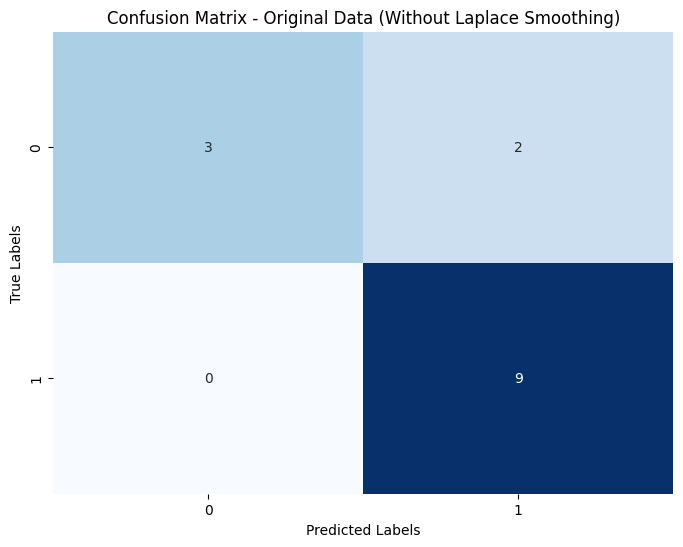

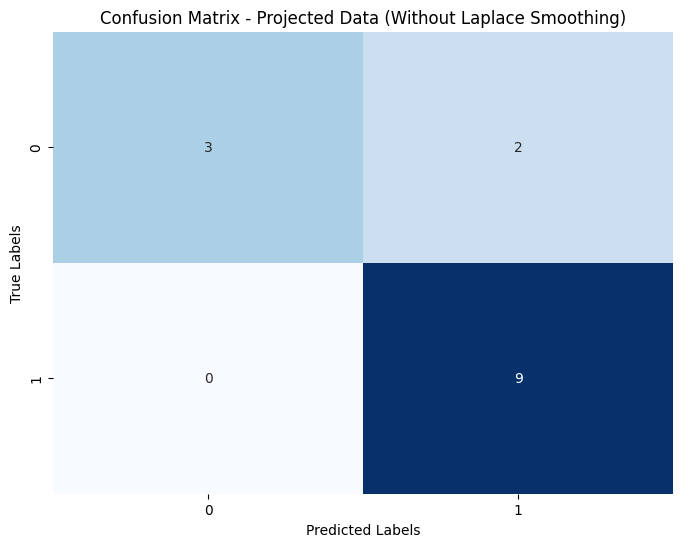

In [216]:
# Confusion matrix for original data without Laplace smoothing
conf_matrix_original = confusion_matrix(y, pred3)

# Plot confusion matrix for original data without Laplace smoothing
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_original, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Original Data (Without Laplace Smoothing)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Confusion matrix for projected data without Laplace smoothing
conf_matrix_projected = confusion_matrix(y, pred4)

# Plot confusion matrix for projected data without Laplace smoothing
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_projected, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Projected Data (Without Laplace Smoothing)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


In [218]:
pd.Series(zip(pred3, pred4, y))

0        (no, no, no)
1        (no, no, no)
2     (yes, yes, yes)
3     (yes, yes, yes)
4     (yes, yes, yes)
5      (yes, yes, no)
6     (yes, yes, yes)
7      (yes, yes, no)
8     (yes, yes, yes)
9     (yes, yes, yes)
10    (yes, yes, yes)
11    (yes, yes, yes)
12    (yes, yes, yes)
13       (no, no, no)
dtype: object

In [220]:
np.array(X)[[5,7]]

array([['Sunny', 'Cool', 'Normal', 't'],
       ['Rainy', 'Mild', 'High', 'f']], dtype=object)